In [2]:
## 기본
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import random
import time
import itertools

In [3]:
# 시각화
import plotly_express as px
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline(connected=True)
## cf.getThemes()
cf.set_config_file(theme='polar')
import plotly.graph_objects as go

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
## plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
class Portfolio(object):
    def __init__(self, equity, max_debit, ltv, estate_err, stock_err, stock_leverage):
        self.equity = equity
        self.max_debit = max_debit
        self.ltv = ltv
        self.estate_err = estate_err
        self.stock_err = stock_err
        self.stock_leverage = stock_leverage

        self.max_estate_price = self.max_debit/self.ltv ## 부동산 최대 구매가능 금액
        self.estate_equity = self.max_estate_price-self.max_debit ## 부동산에 투입될 자기자본
        self.stock_equity = self.equity-self.estate_equity ## 주식에 투입될 자기자본

        self.equity_exp_ls = [(self.calc_estate_value(i), self.calc_stock_value(i), self.max_debit,
                              self.calc_equity_exp(self.calc_estate_value(i), self.calc_stock_value(i)))
                              for i in range(21)]
        self.value_info = pd.DataFrame([self.equity, self.max_debit, self.max_estate_price, self.estate_equity, self.stock_equity],
                                 index=['equity', 'debit', 'estate_price', 'estate_equity', 'stock_equity'], columns=['value'])
        self.ratio_info = pd.DataFrame([self.ltv, self.estate_err, self.stock_err, self.stock_leverage],
                                    index=['ltv', 'estate_err', 'stock_err', 'stock_leverage'], columns=['value']).astype(float)
        self.simulation = pd.DataFrame(self.equity_exp_ls, columns=['estate_value', 'stock_value', 'debit', 'equity'])


    ## 부동산기대가치 산출함수
    def calc_estate_value(self, year):
        return self.max_estate_price * (1+self.estate_err)**year
    ## 주식기대가치 산출함수
    def calc_stock_value(self, year):
        return self.stock_equity * (1+self.stock_err*(1+self.stock_leverage))**year
    def calc_equity_exp(self, estate_value_exp, stock_value_exp):
        return estate_value_exp + stock_value_exp - self.max_debit


In [35]:
## input
equity = 11*1e8 # 자기자본
max_debit = 7.5*1e8 # 최대대출가능금액
ltv = 0.7 # 자산가격대비 최대대출비중
estate_rate = 0.65 # 부동산 기대수익률
stock_rate = 0.20 # 주식 기대수익률
stock_leverage = 1 # 주식 레버리지

In [36]:
portfolio = Portfolio(equity, max_debit, ltv, estate_rate, stock_rate, stock_leverage)

In [37]:
round(portfolio.value_info/1e8, 2)

,value
equity,11.00
debit,7.50
estate_price,10.71
estate_equity,3.21
stock_equity,7.79


In [14]:
(portfolio.ratio_info*100).astype(int)

,value
ltv,60
estate_err,65
stock_err,20
stock_leverage,100


In [42]:
round(portfolio.simulation/1e8, 2).head(5)

,estate_value,stock_value,debit,equity
0,12.50,6.00,7.5,11.00
1,13.12,7.44,7.5,13.06
2,13.78,9.23,7.5,15.51
3,14.47,11.44,7.5,18.41
4,15.19,14.19,7.5,21.88


<Axes: >

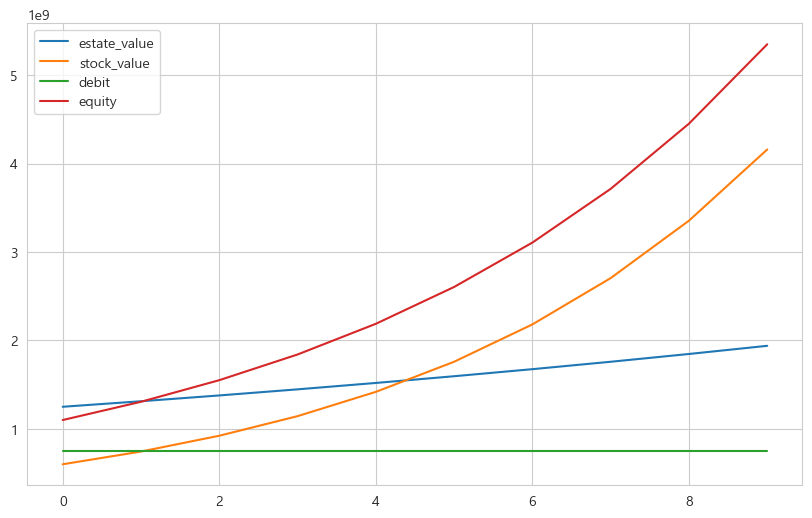

In [43]:
portfolio.simulation.head(10).plot()